# FM CW LAYDAR

In [28]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

## 変数定義

c: 光速[m/s]

v0: 自物の速度[m/s]

v1: 目標物の速度[m/s]

dt: 時間分解能

fout_avg: 出力周波数[Hz]

fout_max: 最高出力周波数[Hz]

fout_min: 最低出力周波数[Hz]

dfdt: 時間毎の出力周波数変化幅[Hz]

t: 時間


In [29]:
c = 2.998 * 10**8
v0 = 0
v1 = 27.78 #時速100km/h相当

dt = 1 * 10 **(-9)
fout_avg = 79 * 10**9
fout_max = 80 * 10**9
fout_min = 78 * 10**9
dfdt = 0.1 * 10 **9

t = np.arange(0, 10**(-7), dt)

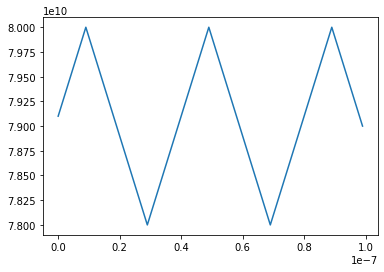

In [34]:
fout = []
ff = fout_avg
code = 1
for tt in t:
    ff = ff + code * dfdt
    fout.append(ff)
    if ff >= fout_max:
        code = -1
    elif ff <= fout_min:
        code = 1
        
plt.plot(t, fout)

In [ ]:
q = 100*1000/60/60
print(q)